In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [40]:
df = pd.read_csv('Position_Salaries.csv')

In [41]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [75]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2:3].values


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [78]:
X = sc_X.fit_transform(X)


/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
y = sc_y.fit_transform(y)

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
from sklearn.svm import SVR

In [81]:
regressor = SVR(kernel='rbf')

In [82]:
regressor.fit(X,y)

/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([ 170370.0204065])

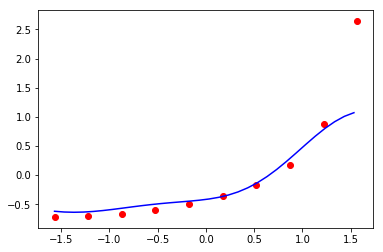

In [89]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')